In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
df=pd.read_csv("/content/drive/MyDrive/Data sets/spam.csv",encoding='latin-1')

In [7]:
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [8]:
df.shape

(5572, 5)

In [9]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [11]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [12]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
df.isna().sum()

v1    0
v2    0
dtype: int64

In [14]:
df.duplicated().sum()

403

In [15]:
df=df.drop_duplicates()

In [16]:
df=df.rename(columns={'v1':'target','v2':'email'})

In [17]:
df

,target,email
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [18]:
encoder = LabelEncoder()
df['target']=encoder.fit_transform(df['target'])

In [19]:
df.head()

,target,email
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

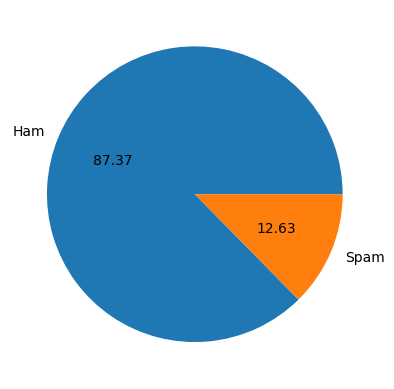

In [21]:
plt.pie(df['target'].value_counts(),labels=['Ham','Spam'],autopct="%0.2f")
plt.show()

In [22]:
import nltk

In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [24]:
df['num_char']=df['email'].apply(len)

In [25]:
df

,target,email,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [26]:
df['num_words']=df['email'].apply(lambda x:len(nltk.word_tokenize(x)))

In [27]:
df.head()

,target,email,num_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [28]:
df['num_sent']=df['email'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [29]:
df.head()

,target,email,num_char,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [30]:
df.describe()

,target,num_char,num_words,num_sent
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [31]:
df[df['target'] == 1][['num_char', 'num_words', 'num_sent']].describe()

,num_char,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [32]:
df[df['target'] == 0][['num_char', 'num_words', 'num_sent']].describe()

,num_char,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


<Axes: xlabel='num_char', ylabel='Count'>

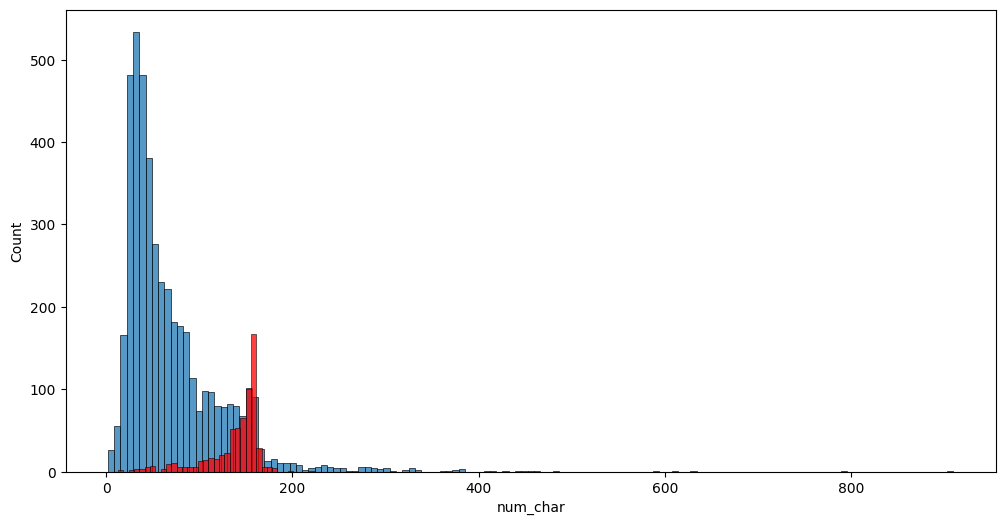

In [33]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_char'])
sns.histplot(df[df['target'] == 1]['num_char'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

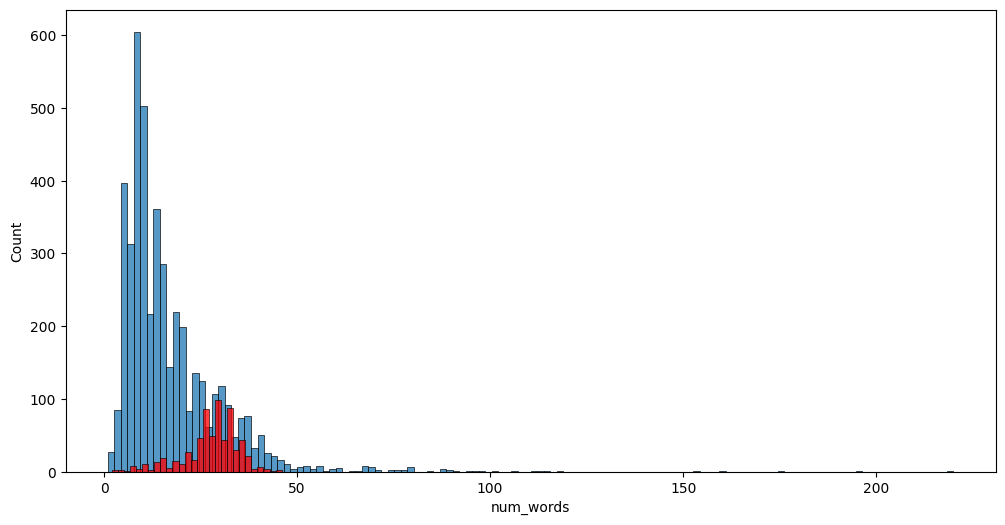

In [34]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

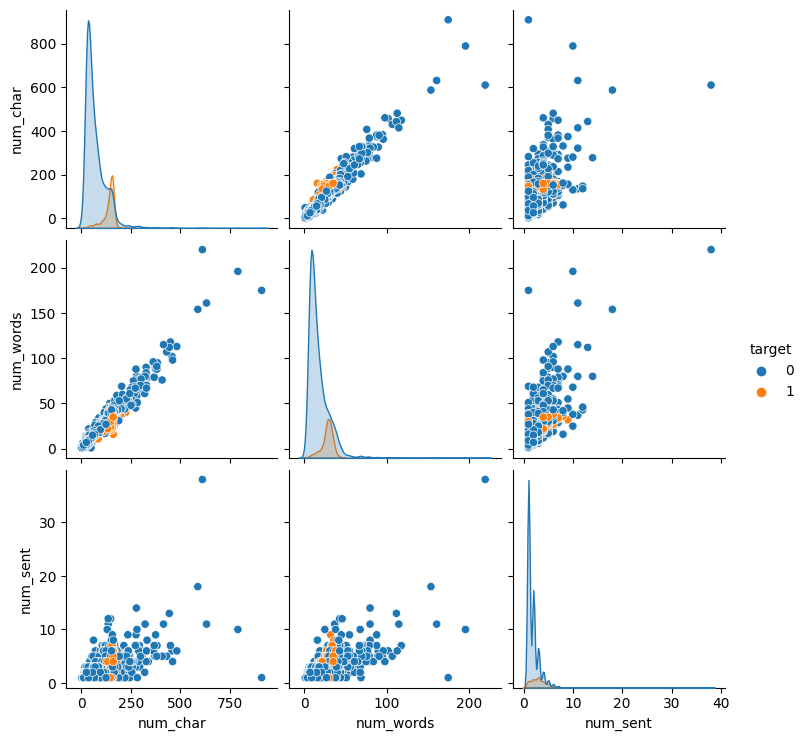

In [35]:
sns.pairplot(df,hue='target')

<ipython-input-36-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

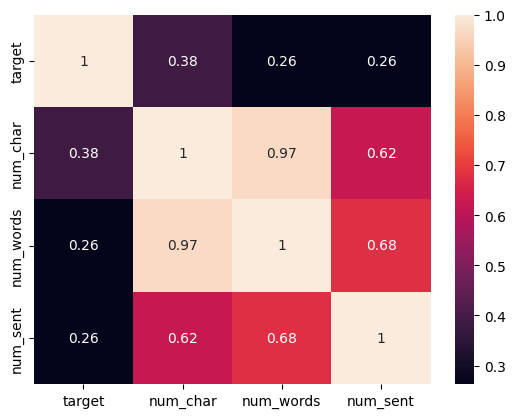

In [36]:
sns.heatmap(df.corr(),annot=True)

**Text Preprossing**


1.   Lower case
2.   Tokenization


3.   Removing Special char

4.   Removing Stop Words and Punctuation
5.   Stemming








In [37]:
# import nltk
# nltk.download()


In [38]:
import nltk
nltk.download('stopwords')
import string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [39]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [40]:
from nltk.stem.snowball import stopwords
def text_preprocess(text):
  text = text.lower()
  text = nltk.word_tokenize(text)

  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)

  text = y[:]
  y.clear()
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)


  text = y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))



  return " ".join(y)

In [41]:
text_preprocess('hi my mane is jay deshmukh %%&*^**(&(&(^*(^)))) i am happy and happyest')

'hi mane jay deshmukh happi happyest'

In [42]:
df['Tras_text']=df['email'].apply(text_preprocess)

In [43]:
df.head(4)

,target,email,num_char,num_words,num_sent,Tras_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say


In [44]:
from wordcloud import WordCloud
wc = WordCloud()

In [45]:
spam_wc = wc.generate(df[df['target'] == 1]['Tras_text'].str.cat(sep=""))

Text(0.5, 1.0, 'Wordclous For Spam Email')

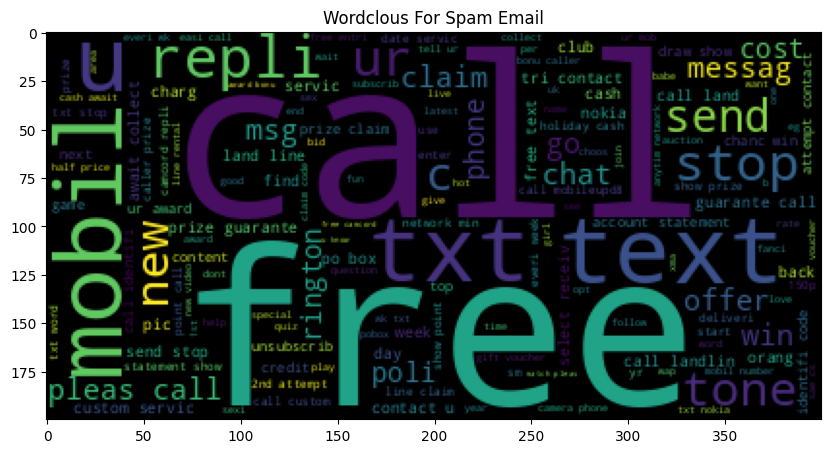

In [46]:
plt.figure(figsize=(10,10))
plt.imshow(spam_wc)
plt.title("Wordclous For Spam Email")

In [47]:
Ham_wc = wc.generate(df[df['target'] == 0]['Tras_text'].str.cat(sep=""))

Text(0.5, 1.0, 'Wordclous For Ham Email')

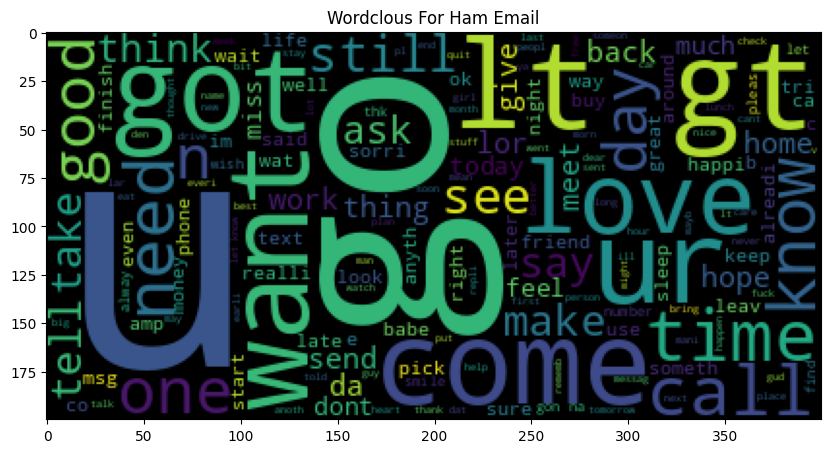

In [48]:
plt.figure(figsize=(10,10))
plt.imshow(Ham_wc)
plt.title("Wordclous For Ham Email")

In [52]:
spam_corpus = []
for msg in df[df['target']==1]['Tras_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)


In [60]:
from collections import Counter
common_spam_word=Counter(spam_corpus).most_common(30)

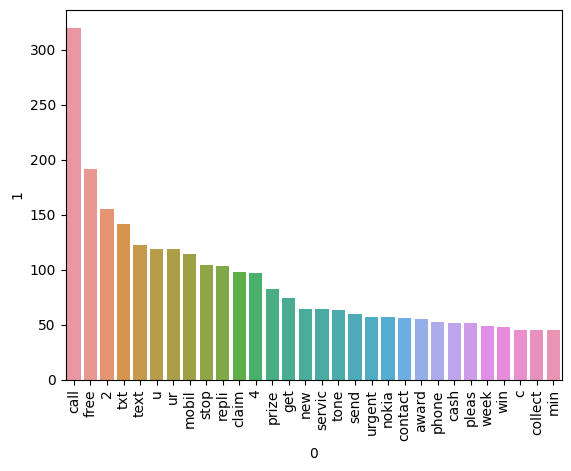

In [73]:
sns.barplot(x=pd.DataFrame(common_spam_word)[0],y=pd.DataFrame(common_spam_word)[1])
plt.xticks(rotation = 'vertical')
plt.show()

In [78]:
ham_corpus = []
for msg in df[df['target']==0]['Tras_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)


In [79]:
common_ham_word=Counter(ham_corpus).most_common(30)

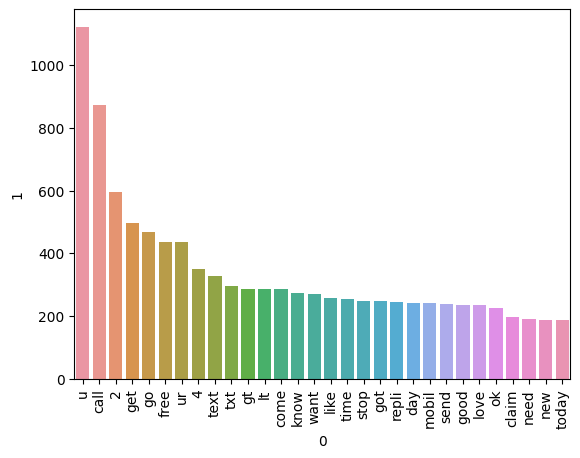

In [81]:
sns.barplot(x=pd.DataFrame(common_ham_word)[0],y=pd.DataFrame(common_ham_word)[1])
plt.xticks(rotation = 'vertical')
plt.show()

**Model Building**

In [107]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [108]:
x = tfidf.fit_transform(df['Tras_text']).toarray()

In [109]:
x.shape

(5169, 6708)

In [110]:
y = df['target'].values

In [111]:
from sklearn.model_selection import train_test_split

In [114]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2 , random_state = 2)

In [115]:
print(x_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [127]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV


In [129]:
mnb = MultinomialNB()
mnb.fit(x_train,y_train)
y_pred = mnb.predict(x_test)
print(accuracy_score(y_pred , y_test))
print(classification_report(y_test, y_pred))
print(precision_score(y_test, y_pred))

0.9593810444874274
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       896
           1       1.00      0.70      0.82       138

    accuracy                           0.96      1034
   macro avg       0.98      0.85      0.90      1034
weighted avg       0.96      0.96      0.96      1034

1.0


In [124]:
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0],
    'fit_prior': [True, False],
    'class_prior': [None, [0.25, 0.25, 0.25, 0.25]]  # Example class priors
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(mnb, param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
40 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py", line 779, in fit
    self._update_class_log_prior(class_prior=class_prior)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py", line 595, in _update_class_log_prior
    raise ValueError("Number of priors must match number o

GridSearchCV(cv=5, estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': [0.1, 0.5, 1.0, 2.0],
                         'class_prior': [None, [0.25, 0.25, 0.25, 0.25]],
                         'fit_prior': [True, False]})

In [130]:
y_pred = grid_search.predict(x_test)
print(accuracy_score(y_pred , y_test))
print(classification_report(y_test, y_pred))
print("-"*30)
print(precision_score(y_test, y_pred))


0.9738878143133463
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       896
           1       0.91      0.89      0.90       138

    accuracy                           0.97      1034
   macro avg       0.95      0.94      0.94      1034
weighted avg       0.97      0.97      0.97      1034

------------------------------
0.9111111111111111


In [131]:
import pickle

In [132]:
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('Model.pkl','wb'))